# Importing Library and Functions 
Now, let's us understand the code.
Firstly we import pandas library which is used for data manipulation in Python.
Next, We import matplotlib library which is used for the data Visualization with verious type of graphs.
After that some functions are imported : "array" --> which is used to make the array Objects with different Dimensions
Other function is "zeros" --> which is used to make array object with '0' as an value in the array.
We need function "mean()" to calculate the mean of data which is present in statistics library.
Finally, to calculate the Score of the Model, here the r2_score is used. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt  
from numpy import array , zeros 
from statistics import mean 
from sklearn.metrics import r2_score  

Then we use "read_csv" function of Pandas to load our dataset into a DataFrame object named "df".
you can directly store the data into the array and use it ,But here we have XL file so directly read data from file.

In [3]:
df = pd.read_excel('ML_practical_1_dataset.xlsx')
df

,CGPA,CGPA .1,SALARY
0,NaN,6.10,0.00
1,NaN,6.15,2.50
2,NaN,6.30,2.25
3,NaN,7.24,6.00
4,NaN,7.50,3.30
5,NaN,7.50,3.75
6,NaN,7.90,4.50
7,NaN,8.00,3.30
8,NaN,8.90,4.00
9,NaN,9.10,3.50


The "CGPA" column represent the independent variable 'x' and the "Salary" column repredent dependent variable 'y'.
The "to_numpy()" --> Is the function that convert the Data into numpay array.
After that each column of data is stored in the 'cgpa' & 'salary' variables and the mean, also kanown as avrage is stored in 'avrage_cgpa'&'avrage_salary'. Finally, the "nr" & "dr" variable store '0' which representing the Numerator and Denominator for calculating the slope.

In [4]:
cgpa = df['CGPA .1'].to_numpy()
salary = df['SALARY'].to_numpy()
avrage_cgpa , avrage_salary = mean(cgpa) , mean(salary)
nr , dr = 0 , 0

let's us understand for what purpose the 'nr' and 'dr' variables are taken. So understand the aim , is to find the equation of best fit line  for prediction of unknoun data using the known data. The Basic equation of line is : -->  "Y = mx + c". 
y --> dependent variable. 
x --> independent variable.
c --> Y intercept.
m --> Slope of the line.

 
#      (x - x') (y - y')     -> This term represent the 'nr' -  Numerator.
#  m = -------------------
#         ( x - x')^2        -> This term represent the 'dr' -  Denominator.

#     c = y' - mx'  

x' & y' are means of respected variable. Here, we are repeating the same thing for evere value of x & y , by using the loop iterating the no. of values present i.e. the length of any column either 'CGPA' or 'Salary'.

In [5]:
for i in range(len(cgpa)):
    nr += (cgpa[i] - avrage_cgpa)* (salary[i] - avrage_salary)
    dr += (cgpa[i] - avrage_cgpa)**2


Here simply calculate the value of 'm' i.e. slope.

In [6]:
slope = nr/dr 
slope

2.1185150235675994

Calculating the value of 'c' i.e. y intercept.

In [7]:

y_intercept = avrage_salary - slope * avrage_cgpa 
print('Equation of line is =' + f'{slope: .2f}*x + {y_intercept: .2f}')

Equation of line is = 2.12*x + -11.85


# Testing for known values of x.
Now, we know the equation : " y = mx + c ". For any value of 'x' we can find the value of y using the equation by puting the value in equation
the variable 'pred_salary' is the array with all values '0' having length equal to the 'cgpa' and dimension equal to 1 for each value of 'x' i.e. 'CGPA' predict value of y and store in 'pred_salary'.

In [8]:
pred_salary = zeros((len(cgpa), 1))
for i in range (len(cgpa)):
    pred_salary[i] = slope * cgpa [i] + y_intercept
pred_salary

array([[1.07279275],
       [1.1787185 ],
       [1.49649576],
       [3.48789988],
       [4.03871379],
       [4.03871379],
       [4.8861198 ],
       [5.0979713 ],
       [7.00463482],
       [7.42833782],
       [8.27574383],
       [8.27574383],
       [8.31811413]])

Ploting the graph of points using the matplotlib library.

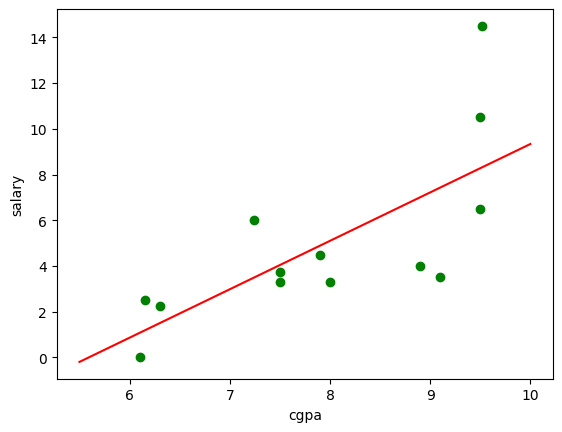

In [9]:
plt.scatter(cgpa , salary , color = 'green')
plt.xlabel('cgpa')
plt.ylabel('salary')
plt.plot([5.5 ,10] , slope * array([5.5 ,10.0]) + y_intercept ,'red')

# Testing for unknown values of x.

In [10]:
pred_cgpa = array([9.11,5.25,8.58,7.26,9.85 ,8 ])
response_salary = zeros((len(pred_cgpa), 1))
for i in range(len(pred_cgpa)):
    response_salary[i] = slope * pred_cgpa[i] + y_intercept


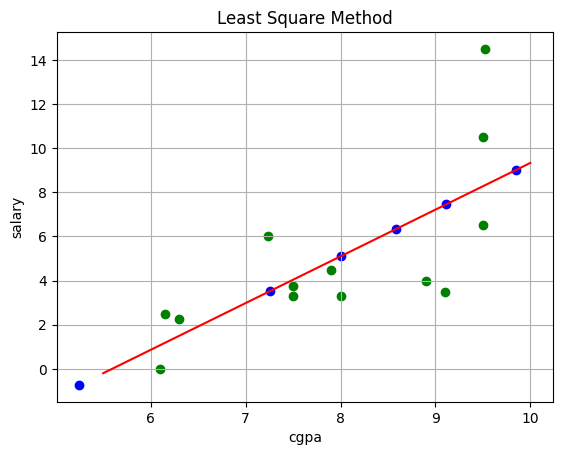

In [14]:
plt.scatter(pred_cgpa, response_salary , color='blue')
plt.scatter(cgpa , salary , color = 'green')
plt.xlabel('cgpa')
plt.ylabel('salary')
plt.title('Least Square Method')
plt.grid()
plt.plot([5.5 ,10] , slope * array([5.5 ,10.0]) + y_intercept ,'red')

In [12]:
# This is the function for testing.
def model( x ):
    y = slope * x + y_intercept
    return y
    
model(8)

5.097971297586032

# Calculating the Score of the Model.

In [13]:
r2_score = round(r2_score(salary , pred_salary) , 2)
r2_score

0.51